In [1]:
from IPython.display import clear_output
import time

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# 1. Анализ данных

In [2]:
%run table_making.ipynb
clear_output()

In [3]:
print(f"Корреляция между логарифмом BTC и ETH: {round(log_btc_eth_df.corr().iloc[0, 1], 3)}")

Корреляция между логарифмом BTC и ETH: 0.934


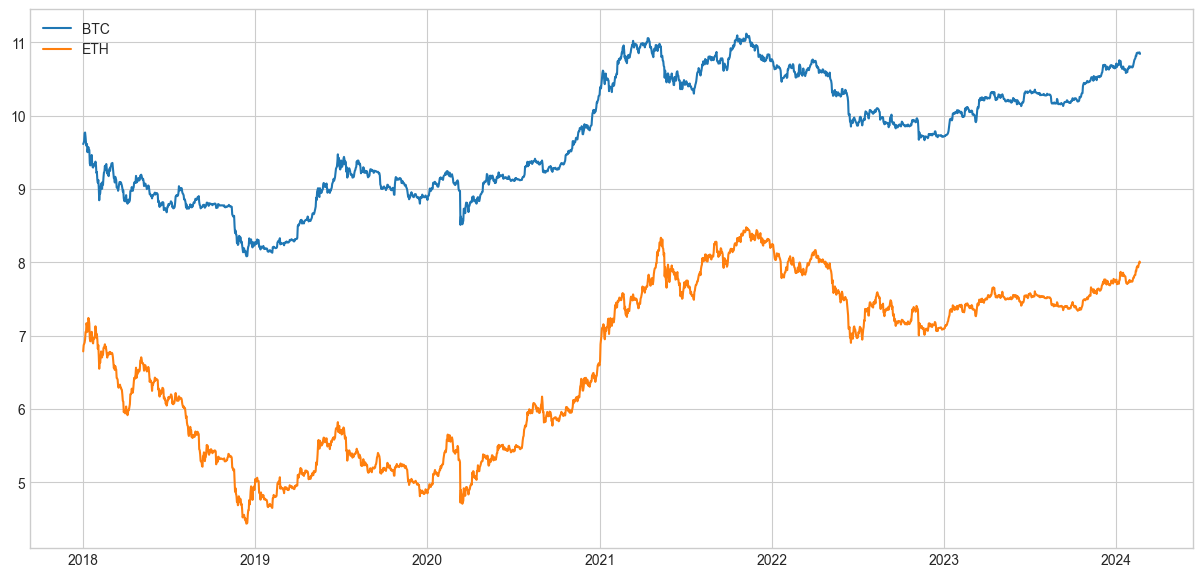

In [4]:
plt.figure(figsize=(15, 7))

plt.plot(log_btc_eth_df.log_btc, label='BTC')
plt.plot(log_btc_eth_df.log_eth, label='ETH')

plt.legend()

plt.savefig('./Images/log_btc_eth.png')
plt.show()

# 2. Одношаговое прогнозирование

## 2.1 Обучение

In [5]:
# Определим гиперпараметры
delta = 1
lags = [5, 10, 20, 50, 100, 200]
sigmas = [0, 0.001, 0.01, 0.03, 0.05, 1]
batch_size = 128

test_history = dict()

In [6]:
try:
    for h in lags:
        for sigma in sigmas:
            %store sigma
            %store h
            %run data_processing.ipynb
            %run one_step_evaluation.ipynb
except KeyboardInterrupt as e:
    clear_output()
    print("Fitting was interrupted")

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.60it/s]


## 2.2. Визуализация

Сначала зафиксируем $h = 20$ и сравним результаты прогнозирования в зависимости от значений $\sigma$.

In [7]:
h_20_history = dict()
for params in test_history:
    h, sigma = params
    if h == 20:
        h_20_history[sigma] = test_history[params]

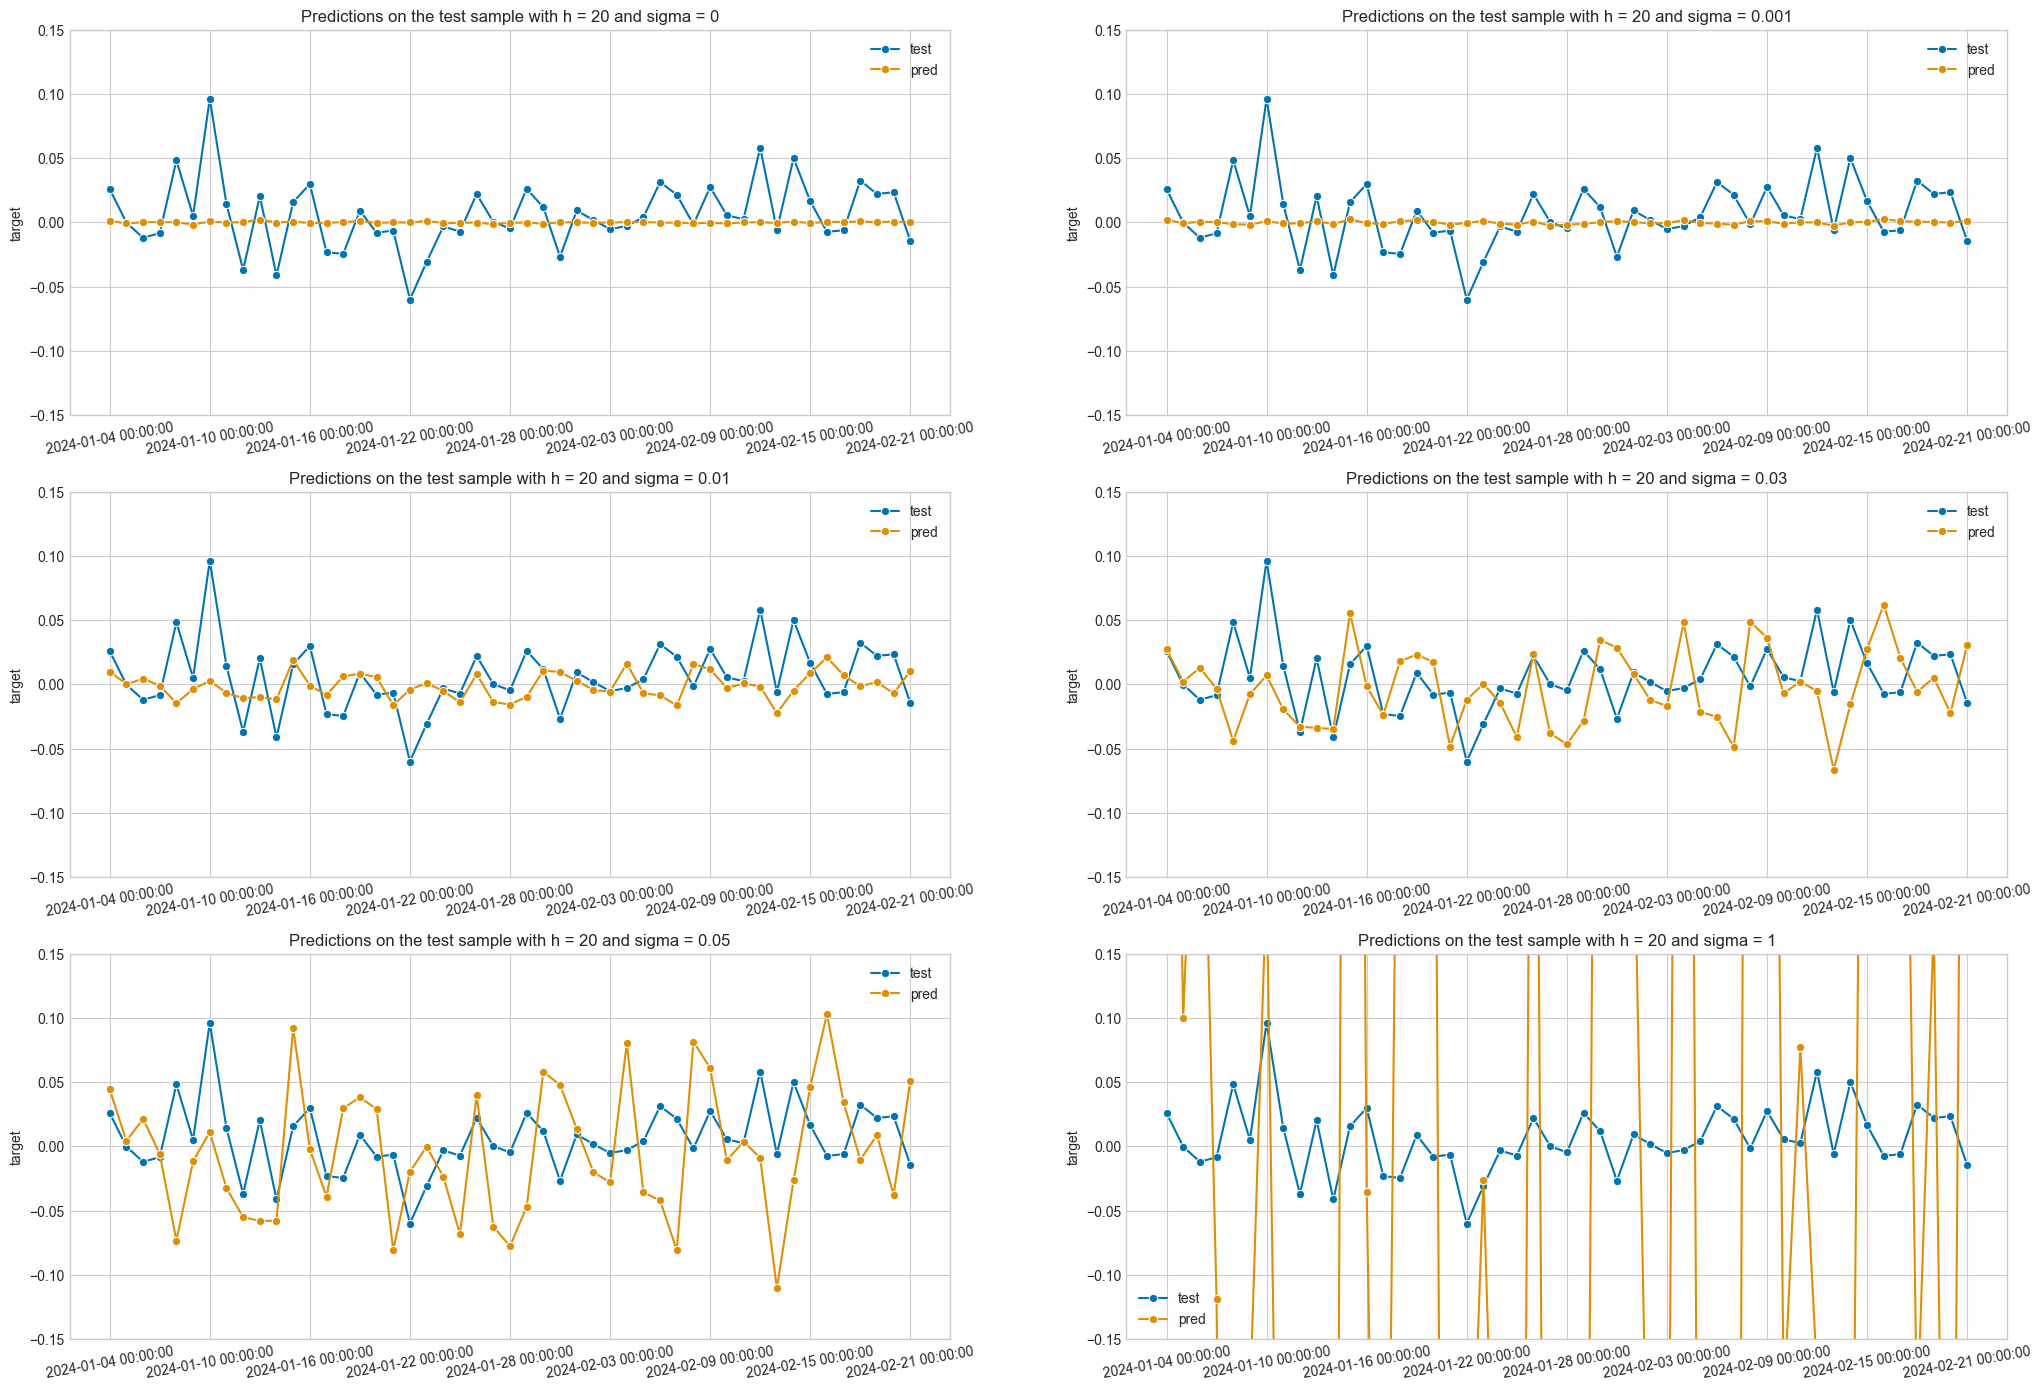

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = 20, sigmas[i]
    
    y_pred_test = h_20_history[sigma]
    
    plot_series(
        y_test[1:], pd.Series(y_pred_test, index=y_test[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)

plt.savefig(f'./Images/h={20}.png')
plt.show()

Теперь аналогично зафиксируем $\sigma = 0.01$ и посмотрим на то, как предсказания зависят от количества используемых лагов $h$.

In [9]:
sigma_001_history = dict()
for params in test_history:
    h, sigma = params
    if sigma == 0.01:
        sigma_001_history[h] = test_history[params]

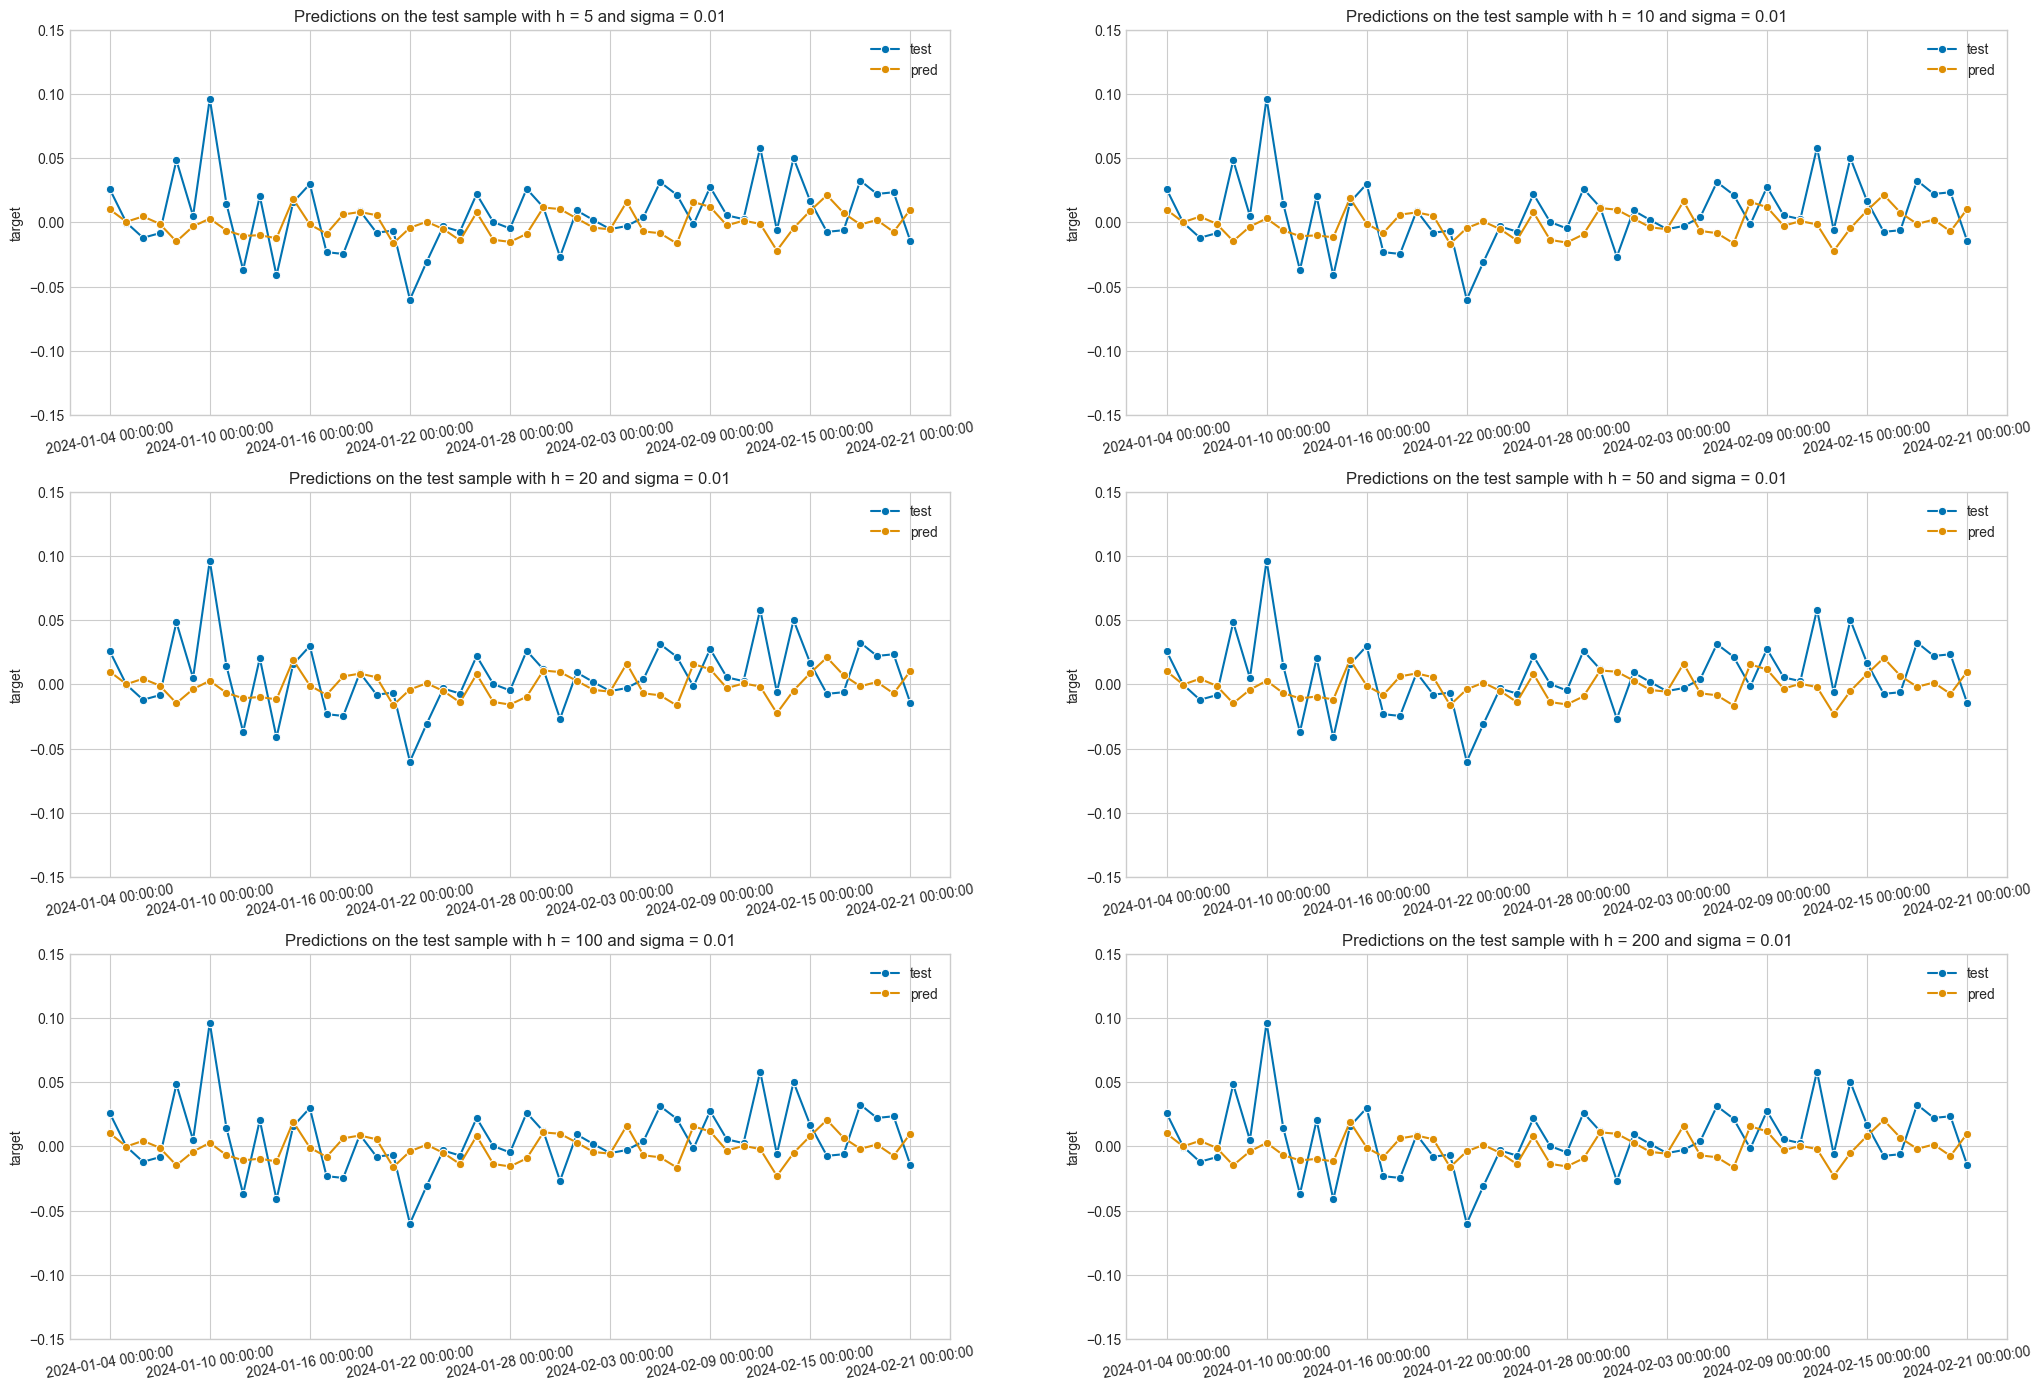

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 17))
axes = axes.flatten()

for i in range(6):
    h, sigma = lags[i], 0.01
    
    y_pred_test = sigma_001_history[h]
    
    plot_series(
        y_test[1:], pd.Series(y_pred_test, index=y_test[1:].index), labels=['test', 'pred'], ax=axes[i]
    )
    
    
    axes[i].tick_params(axis='x', rotation=10)
    axes[i].set_title(f"Predictions on the test sample with h = {h} and sigma = {sigma}")
    axes[i].set_ylim(-0.15, 0.15)


plt.savefig(f'./Images/sigma={0.01}.png')
plt.show()